In [2]:
##This dataset is from picklesueat, and contains more than 2000 job listings for data analyst positions, along with detailed information about these positions. The link is [https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs/data](https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs/data).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16808\687462750.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data_analyst = pd.read_csv('DataAnalyst.csv')

In [5]:
# Rename columns for clarity
columns_to_rename = {
    "Job Title": "job_title", 
    "Salary Estimate": "salary_estimate", 
    "Job Description": "job_description", 
    "Company Name": "company_name", 
    "Location": "location", 
    "Headquarters": "headquarters", 
    "Size": "size", 
    "Type of ownership": "type_of_ownership", 
    "Industry": "industry", 
    "Sector": "sector", 
    "Revenue": "revenue", 
    "Easy Apply": "easy_apply"
}
data_analyst.rename(columns=columns_to_rename, inplace=True)

In [6]:
# Simplify job titles to avoid duplicates
job_title_replacements = {
    'Sr. Data Analyst|sr. data analyst|Sr Data Analyst|sr data analyst|senior data analyst|Senior Data Analyst|Data Analyst III|data analyst iii': 'Senior Data Analyst',
    'Data Analyst I|data analyst i|Data Analyst Junior|data analyst junior|Junior Data Analyst|Junior Data AnalystI|Junior Data Analystl': 'Junior Data Analyst',
    'Data Analyst II|data analyst ii|Middle Data Analyst': 'Middle Data Analyst'
}
for pattern, replacement in job_title_replacements.items():
    data_analyst['job_title'] = data_analyst['job_title'].replace(pattern, replacement, regex=True)

In [7]:
# Extract minimum and maximum salary from 'salary_estimate'
data_analyst[['MinSalary', 'MaxSalary']] = data_analyst['salary_estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')

# Convert extracted salary strings to numeric
data_analyst['MinSalary'] = pd.to_numeric(data_analyst['MinSalary'], errors='coerce')
data_analyst['MaxSalary'] = pd.to_numeric(data_analyst['MaxSalary'], errors='coerce')

# Calculate the average salary
data_analyst['average_salary'] = (data_analyst['MinSalary'] + data_analyst['MaxSalary']) / 2

# Drop columns not needed for the plot
data_analyst.drop(['salary_estimate', 'MinSalary', 'MaxSalary'], axis=1, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16808\2519888934.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TOP_counts.values, y=TOP_counts.index, palette='tab20')  # 'tab20' is a palette with 20 distinct colors


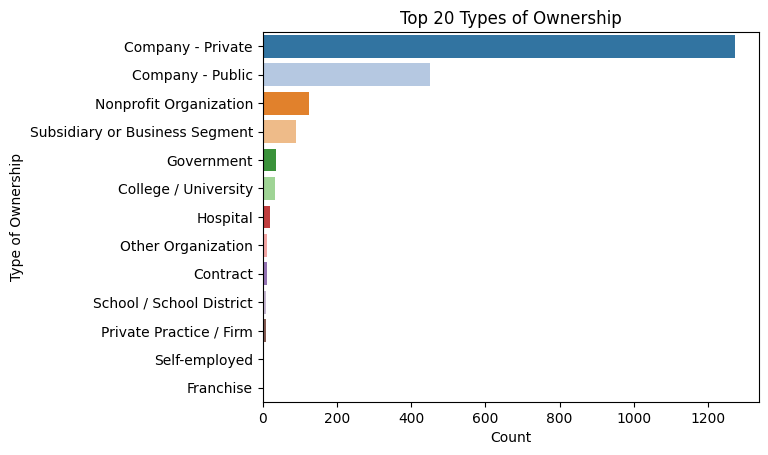

In [17]:
# Filter the data to exclude rows where 'type_of_ownership' is '-1' or 'Unknown'
TOP = data_analyst[(data_analyst['type_of_ownership'] != '-1') & 
                        (data_analyst['type_of_ownership'] != 'Unknown')]

# Count occurrences of each type of ownership and select the top 20
TOP_counts = TOP['type_of_ownership'].value_counts().head(20)

# Create a horizontal bar plot to display the top 20 types of ownership using a vibrant color palette
sns.barplot(x=TOP_counts.values, y=TOP_counts.index, palette='tab20')  # 'tab20' is a palette with 20 distinct colors

# Labeling the axes
plt.xlabel('Count')  # Label for the x-axis
plt.ylabel('Type of Ownership')  # Label for the y-axis

# Adding a title to the plot
plt.title('Top 20 Types of Ownership')  # Title of the plot

# Display the plot
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16808\1523978152.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_analyst_sector.values, y=data_analyst_sector.index, palette='viridis')  # Added a color palette for better visual distinction


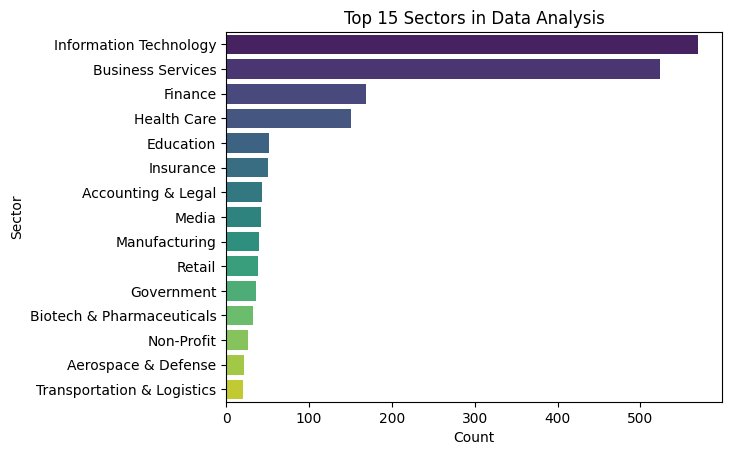

In [13]:
# Filter out data where the 'sector' value is '-1' and calculate the frequency of each sector.
# Only keep the top 15 sectors to maintain a focus on the most common ones.
data_analyst_sector = data_analyst[data_analyst['sector'] != '-1']['sector'].value_counts().head(15)

# Create a horizontal bar plot to visualize the number of data analyst jobs in each sector.
# The data is plotted such that the sectors are on the y-axis and the counts on the x-axis.
sns.barplot(x=data_analyst_sector.values, y=data_analyst_sector.index, palette='viridis')  # Added a color palette for better visual distinction

# Set the labels and title of the plot to clearly describe what is being shown.
plt.xlabel('Count')
plt.ylabel('Sector')
plt.title('Top 15 Sectors in Data Analysis')

# Display the plot
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16808\405028514.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sector', y='average_salary', data=average_salary_by_sector, palette='deep')  # 'deep' palette for vibrant colors


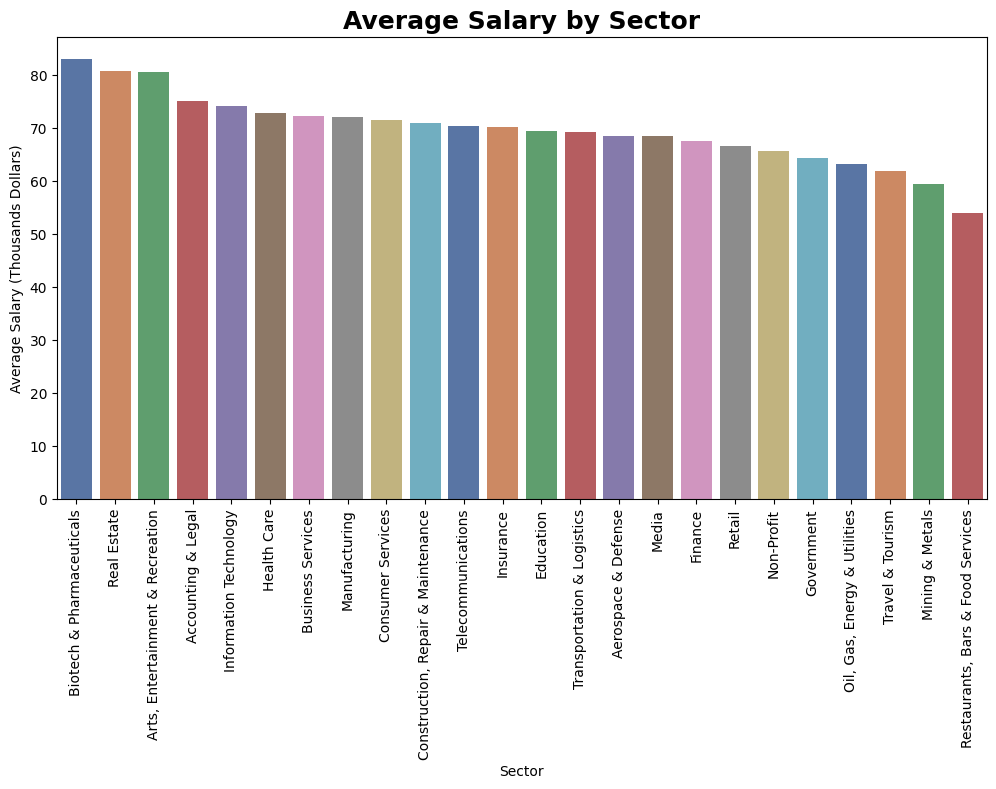

In [12]:
# Filter and group data to calculate the mean salary by sector, ignoring sectors marked as '-1'
average_salary_by_sector = data_analyst[data_analyst['sector'] != '-1'].groupby('sector')['average_salary'].mean().reset_index()

# Sort sectors by average salary in descending order
average_salary_by_sector = average_salary_by_sector.sort_values(by='average_salary', ascending=False)

# Create a bar plot visualizing the average salary by sector with a diverse color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='sector', y='average_salary', data=average_salary_by_sector, palette='deep')  # 'deep' palette for vibrant colors

plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Average Salary (Thousands Dollars)')

# Enhance the plot title with larger font size and bold style
plt.title('Average Salary by Sector', fontsize=18, fontweight='bold')

# Display the plot
plt.show()